# 18_Dibetes_model

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Problem Statement

# Data Gathering

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,50,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,52,1
3,150,66,23,94,28.1,0.167,21,0
4,150,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Exporatory Data Analysis

### Glucose

In [5]:
df['Glucose']

0      148
1       85
2      183
3      150
4      150
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [6]:
df['Glucose'].value_counts()

100    17
99     17
150    15
106    14
129    14
       ..
44      1
177     1
191     1
61      1
190     1
Name: Glucose, Length: 136, dtype: int64

### BloodPressure

In [7]:
df['BloodPressure']

0      50
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64

In [8]:
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
64     43
72     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
58     21
86     21
50     14
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

### SkinThickness

In [9]:
df['SkinThickness']

0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64

In [10]:
df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

### Insulin

In [11]:
df['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [12]:
df['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

### BMI

In [13]:
df['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [14]:
df['BMI'].value_counts()

32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 248, dtype: int64

### DiabetesPedigreeFunction

In [15]:
df['DiabetesPedigreeFunction']

0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

In [16]:
df['DiabetesPedigreeFunction'].value_counts()

0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

### Age

In [17]:
df['Age']

0      50
1      31
2      52
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

In [18]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    15
45    15
34    14
43    13
46    13
40    13
39    12
35    11
52     9
50     8
51     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
60     5
66     4
53     4
62     4
55     4
63     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


# Feature Engineering

<AxesSubplot:>

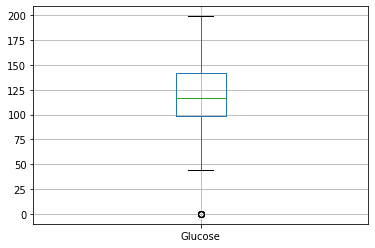

In [20]:
df[['Glucose']].boxplot() # 1

q1--> 99.0
q2--> 117.0
q3--> 142.0
upper_tail--> 206.5
lower_tail--> 34.5
mean--> 121.1171875
118.0


<AxesSubplot:>

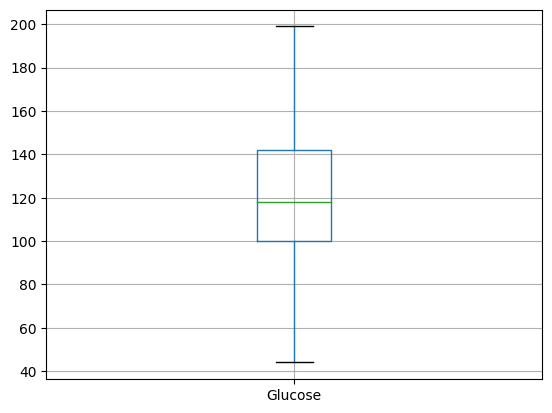

In [21]:
q1=df['Glucose'].quantile(0.25)
q2=df['Glucose'].quantile(0.50)
q3=df['Glucose'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['Glucose'].mean()))

df['Glucose'].median()

size_df=df[['Glucose']].loc[(df['Glucose'] < upper_tail) & 
                                   (df['Glucose'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['Glucose'] > upper_tail) |
                (df['Glucose'] < lower_tail), 'Glucose'] = size_df


df[['Glucose']].boxplot()

<AxesSubplot:>

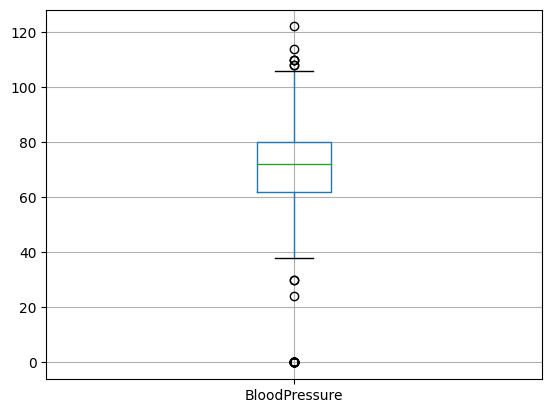

In [22]:
df[['BloodPressure']].boxplot() # 2

q1--> 62.0
q2--> 72.0
q3--> 80.0
upper_tail--> 107.0
lower_tail--> 35.0
mean--> 69.07682291666667
72.0


<AxesSubplot:>

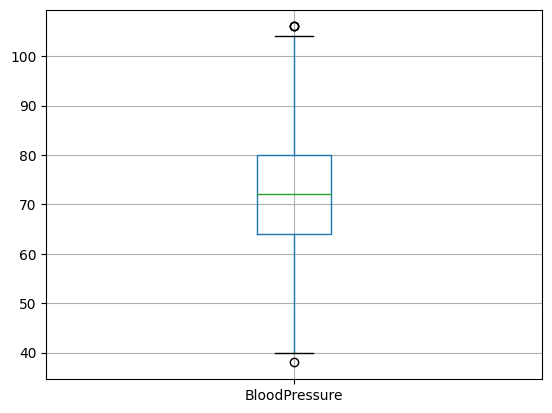

In [23]:
q1=df['BloodPressure'].quantile(0.25)
q2=df['BloodPressure'].quantile(0.50)
q3=df['BloodPressure'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['BloodPressure'].mean()))

df['BloodPressure'].median()

size_df=df[['BloodPressure']].loc[(df['BloodPressure'] < upper_tail) & 
                                   (df['BloodPressure'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['BloodPressure'] > upper_tail) |
                (df['BloodPressure'] < lower_tail), 'BloodPressure'] = size_df


df[['BloodPressure']].boxplot()

<AxesSubplot:>

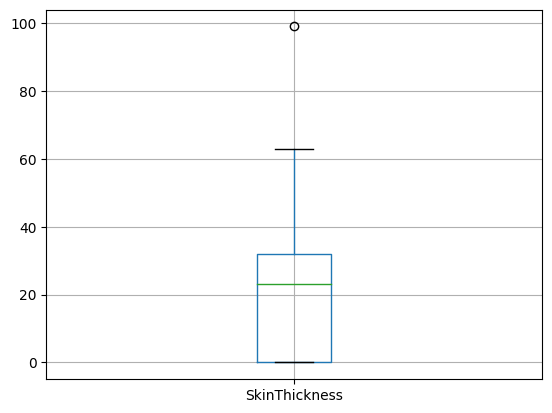

In [24]:
df[['SkinThickness']].boxplot() # 3

q1--> 0.0
q2--> 23.0
q3--> 32.0
upper_tail--> 80.0
lower_tail--> -48.0
mean--> 20.536458333333332
23.0


<AxesSubplot:>

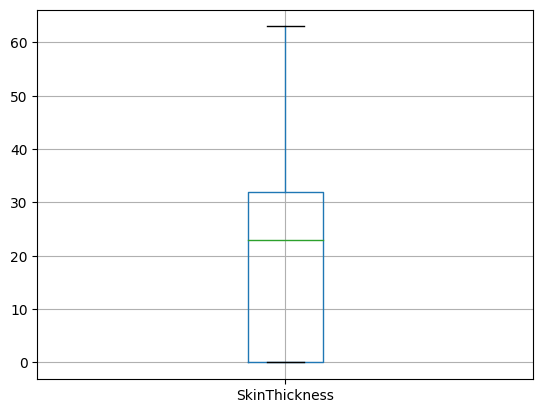

In [25]:
q1=df['SkinThickness'].quantile(0.25)
q2=df['SkinThickness'].quantile(0.50)
q3=df['SkinThickness'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['SkinThickness'].mean()))

df['SkinThickness'].median()

size_df=df[['SkinThickness']].loc[(df['SkinThickness'] < upper_tail) & 
                                   (df['SkinThickness'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['SkinThickness'] > upper_tail) |
                (df['SkinThickness'] < lower_tail), 'SkinThickness'] = size_df


df[['SkinThickness']].boxplot()


<AxesSubplot:>

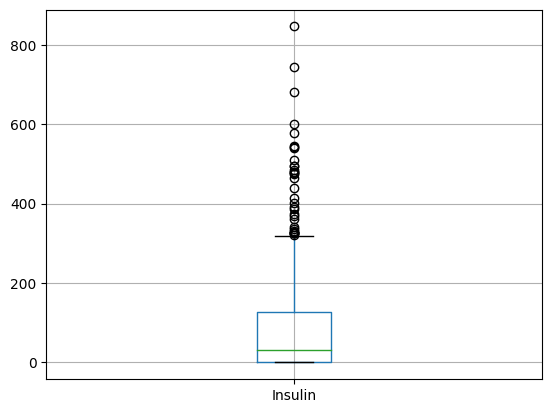

In [26]:
df[['Insulin']].boxplot() # 4

q1--> 0.0
q2--> 30.5
q3--> 127.25
upper_tail--> 318.125
lower_tail--> -190.875
mean--> 79.79947916666667
0.0


<AxesSubplot:>

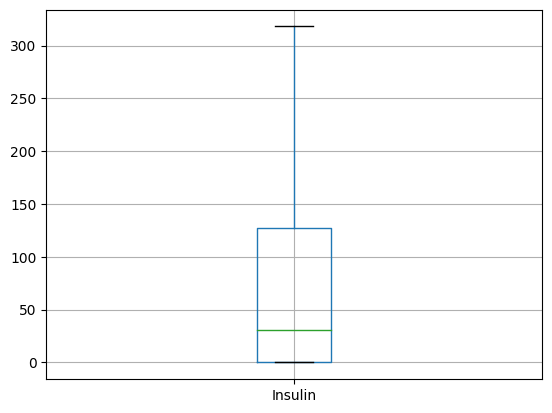

In [27]:
q1=df['Insulin'].quantile(0.25)
q2=df['Insulin'].quantile(0.50)
q3=df['Insulin'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['Insulin'].mean()))

df['Insulin'].median()

size_df=df[['Insulin']].loc[(df['Insulin'] < upper_tail) & 
                                   (df['Insulin'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['Insulin'] > upper_tail) |
                (df['Insulin'] < lower_tail), 'Insulin'] = upper_tail


df[['Insulin']].boxplot()

<AxesSubplot:>

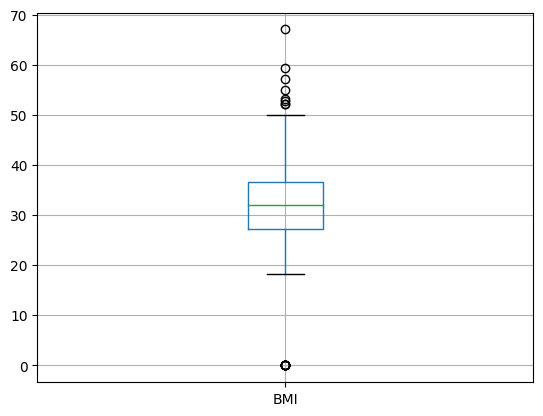

In [28]:
df[['BMI']].boxplot() # 5

q1--> 27.3
q2--> 32.0
q3--> 36.6
upper_tail--> 50.550000000000004
lower_tail--> 13.35
mean--> 31.992578124999998
32.0


<AxesSubplot:>

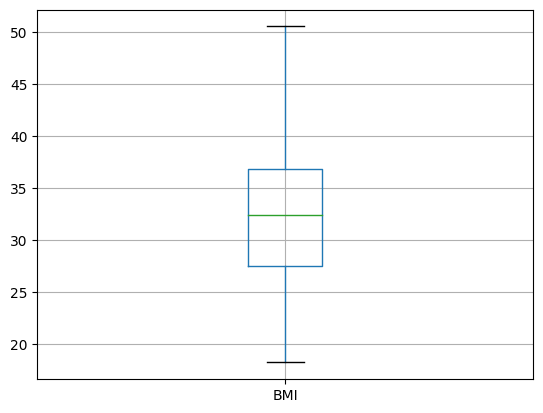

In [29]:
q1=df['BMI'].quantile(0.25)
q2=df['BMI'].quantile(0.50)
q3=df['BMI'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['BMI'].mean()))

df['BMI'].median()

size_df=df[['BMI']].loc[(df['BMI'] < upper_tail) & 
                                   (df['BMI'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['BMI'] > upper_tail) |
                (df['BMI'] < lower_tail), 'BMI'] = upper_tail


df[['BMI']].boxplot()

<AxesSubplot:>

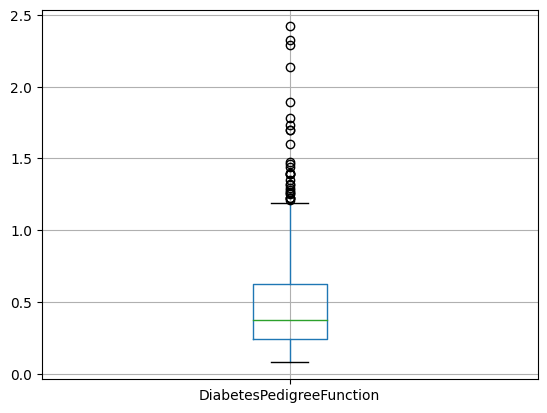

In [30]:
df[['DiabetesPedigreeFunction']].boxplot()# 6

q1--> 0.24375
q2--> 0.3725
q3--> 0.62625
upper_tail--> 1.2
lower_tail--> -0.32999999999999996
mean--> 0.47187630208333325
0.356


<AxesSubplot:>

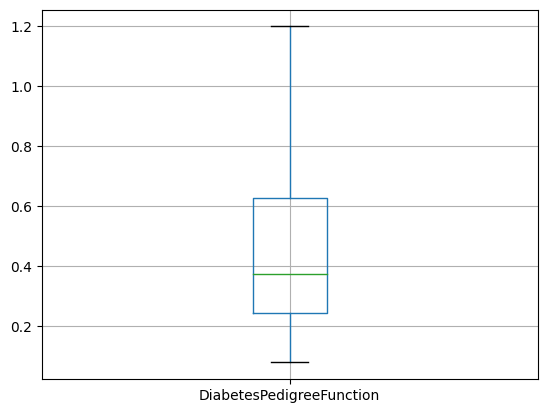

In [31]:
q1=df['DiabetesPedigreeFunction'].quantile(0.25)
q2=df['DiabetesPedigreeFunction'].quantile(0.50)
q3=df['DiabetesPedigreeFunction'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['DiabetesPedigreeFunction'].mean()))

df['DiabetesPedigreeFunction'].median()

size_df=df[['DiabetesPedigreeFunction']].loc[(df['DiabetesPedigreeFunction'] < upper_tail) & 
                                   (df['DiabetesPedigreeFunction'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['DiabetesPedigreeFunction'] > upper_tail) |
                (df['DiabetesPedigreeFunction'] < lower_tail), 'DiabetesPedigreeFunction'] = upper_tail


df[['DiabetesPedigreeFunction']].boxplot()

<AxesSubplot:>

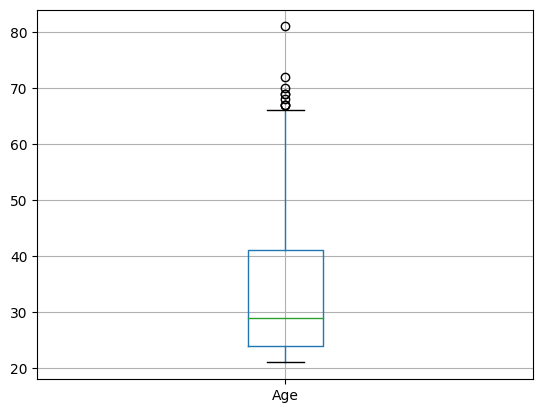

In [32]:
df[['Age']].boxplot() # 7

q1--> 24.0
q2--> 29.0
q3--> 41.0
upper_tail--> 66.5
lower_tail--> -1.5
mean--> 33.243489583333336
29.0


<AxesSubplot:>

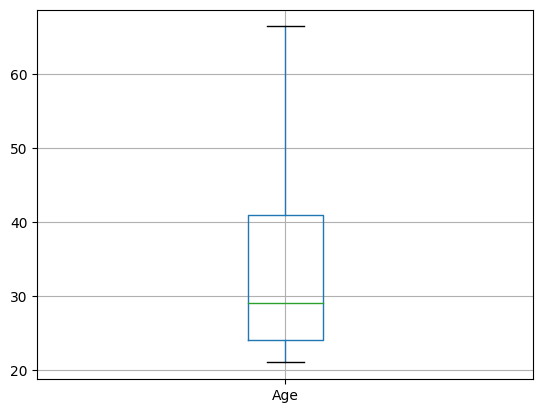

In [33]:
q1=df['Age'].quantile(0.25)
q2=df['Age'].quantile(0.50)
q3=df['Age'].quantile(0.75)

iqr = q3-q1

upper_tail=q3+1.5*iqr
lower_tail=q1-1.5*iqr

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

print("mean-->",(df['Age'].mean()))

df['Age'].median()

size_df=df[['Age']].loc[(df['Age'] < upper_tail) & 
                                   (df['Age'] > lower_tail)].median()[0]
print(size_df)  

df.loc[(df['Age'] > upper_tail) |
                (df['Age'] < lower_tail), 'Age'] = upper_tail


df[['Age']].boxplot()

# Feature selection

In [35]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.201716,0.053251,0.299601,0.204516,0.113277,0.261650,0.489484
BloodPressure,0.201716,1.000000,0.023198,-0.047564,0.280226,0.015485,0.319728,0.160946
SkinThickness,0.053251,0.023198,1.000000,0.496373,0.326691,0.177653,-0.138106,0.067344
Insulin,0.299601,-0.047564,0.496373,1.000000,0.157390,0.190087,-0.072597,0.124721
BMI,0.204516,0.280226,0.326691,0.157390,1.000000,0.122081,0.021778,0.284570
DiabetesPedigreeFunction,0.113277,0.015485,0.177653,0.190087,0.122081,1.000000,0.051098,0.184969
Age,0.261650,0.319728,-0.138106,-0.072597,0.021778,0.051098,1.000000,0.243051
Outcome,0.489484,0.160946,0.067344,0.124721,0.284570,0.184969,0.243051,1.000000


<AxesSubplot:>

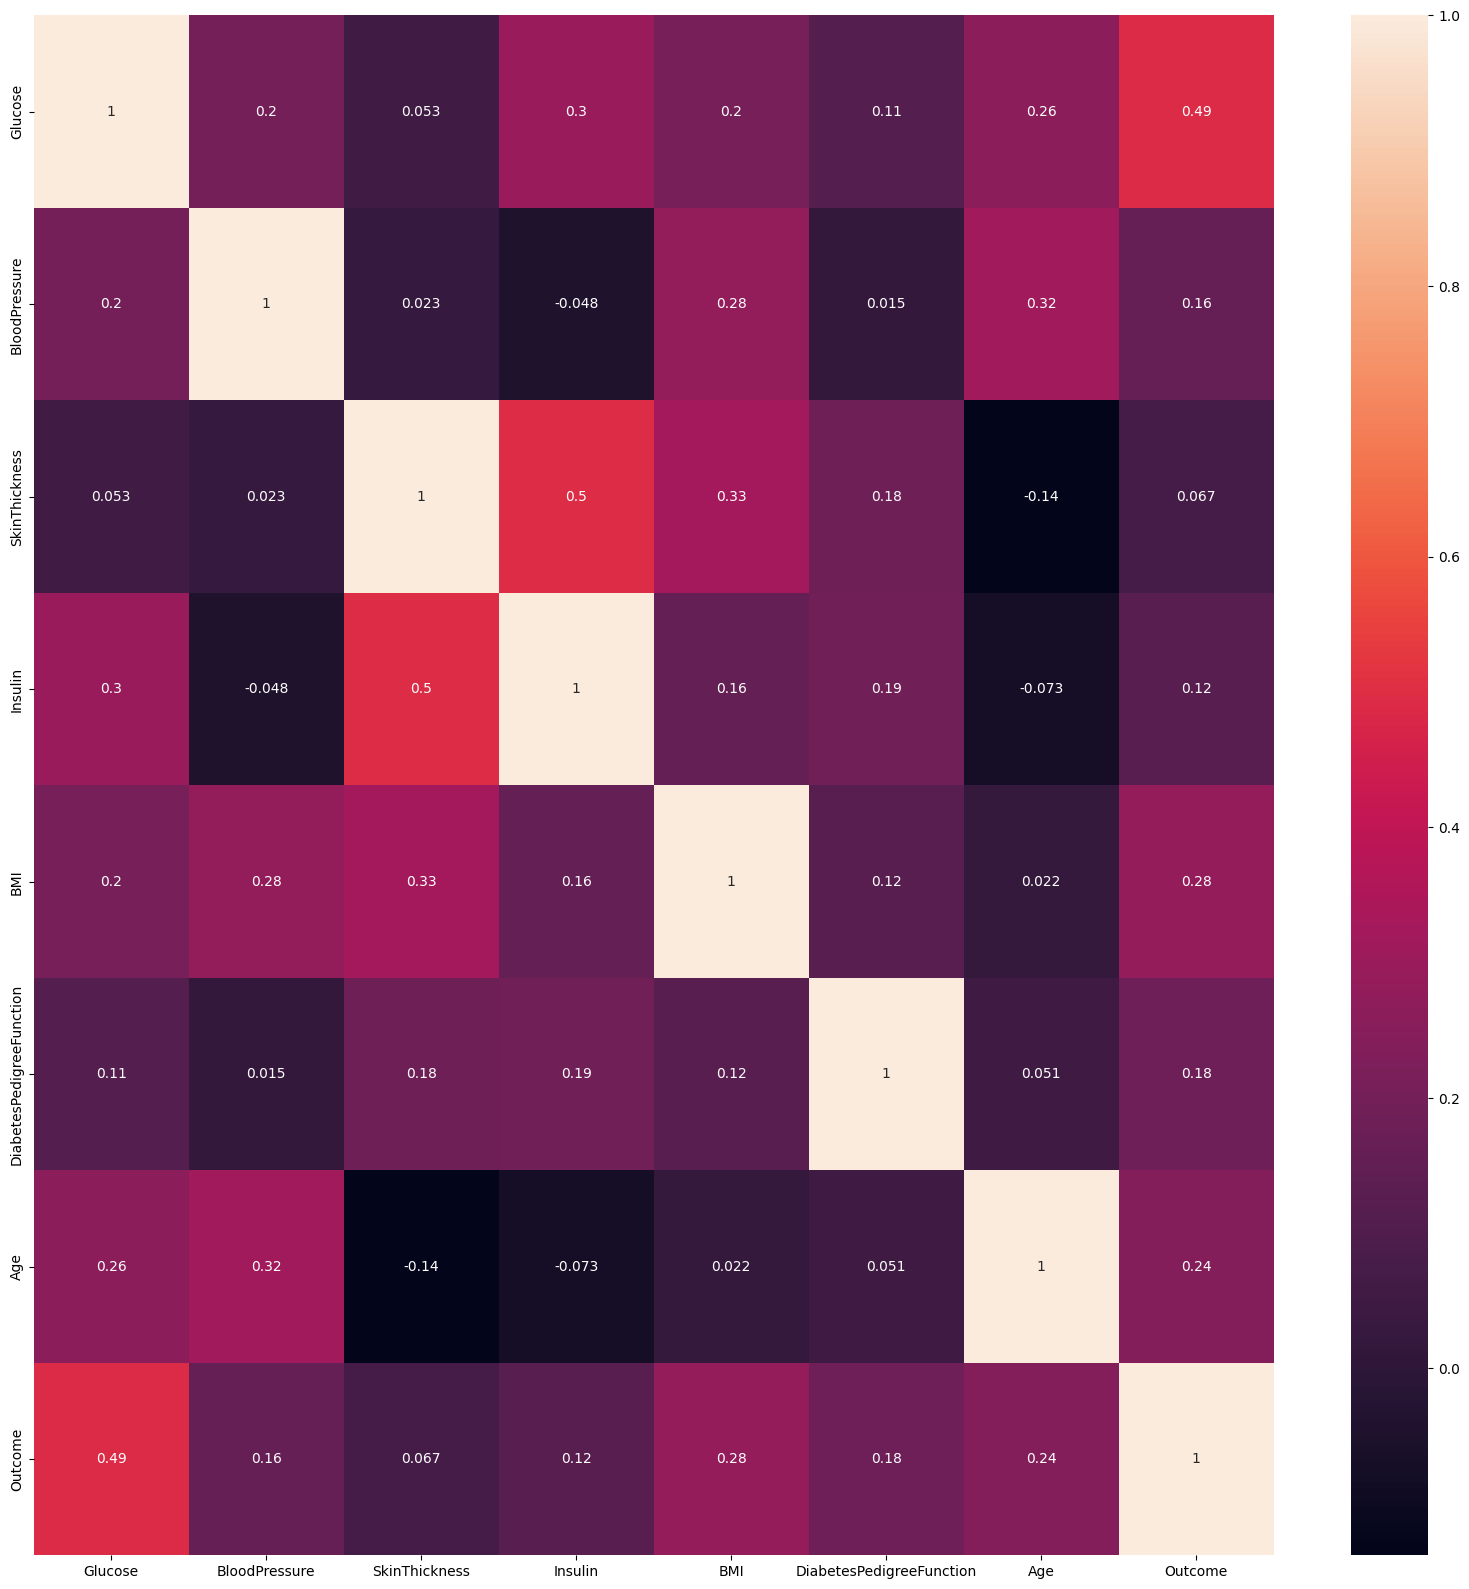

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot = True)

# Model Training

In [38]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1,stratify =y)

In [48]:
dibetes_model = LogisticRegression()
dibetes_model.fit(x_train,y_train)

LogisticRegression()

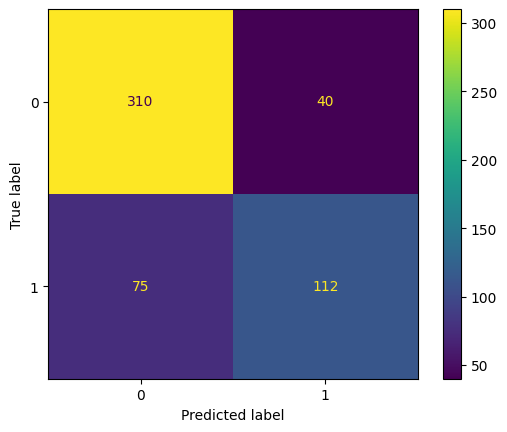

In [49]:
# Training Data
plot_confusion_matrix(dibetes_model, x_train, y_train)

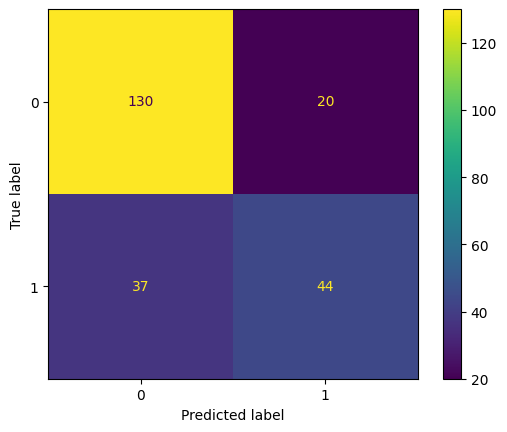

In [50]:
# Training Data
plot_confusion_matrix(dibetes_model, x_test, y_test)

In [51]:
# Training Accuracy
dibetes_model.score(x_train, y_train)

0.7858472998137802

In [52]:
# Testing Accuracy
dibetes_model.score(x_test, y_test)

0.7532467532467533

# Model Evaluation

In [53]:
# # prediction
y_pred = dibetes_model.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [54]:
# prediction probability
y_pred_proba = dibetes_model.predict_proba(x_test)
y_pred_proba

array([[0.74454344, 0.25545656],
       [0.14223606, 0.85776394],
       [0.75425271, 0.24574729],
       [0.96139613, 0.03860387],
       [0.65613599, 0.34386401],
       [0.90608547, 0.09391453],
       [0.13628113, 0.86371887],
       [0.70445988, 0.29554012],
       [0.51779303, 0.48220697],
       [0.9169873 , 0.0830127 ],
       [0.7425744 , 0.2574256 ],
       [0.25722473, 0.74277527],
       [0.94219942, 0.05780058],
       [0.48702504, 0.51297496],
       [0.96750393, 0.03249607],
       [0.92761026, 0.07238974],
       [0.68678348, 0.31321652],
       [0.86740699, 0.13259301],
       [0.55816932, 0.44183068],
       [0.93923597, 0.06076403],
       [0.60358131, 0.39641869],
       [0.68546931, 0.31453069],
       [0.72999668, 0.27000332],
       [0.14127056, 0.85872944],
       [0.16622768, 0.83377232],
       [0.31450444, 0.68549556],
       [0.55998319, 0.44001681],
       [0.70913229, 0.29086771],
       [0.37699099, 0.62300901],
       [0.4822951 , 0.5177049 ],
       [0.

In [55]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[130  20]
 [ 37  44]]
*********************************************
Accuracy Score: 0.7532467532467533
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.54      0.61        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.75      0.75      0.75       231



In [56]:
# Training data

# prediction
y_pred_train = dibetes_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[310  40]
 [ 75 112]]
*********************************************
Accuracy Score: 0.7858472998137802
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       350
           1       0.74      0.60      0.66       187

    accuracy                           0.79       537
   macro avg       0.77      0.74      0.75       537
weighted avg       0.78      0.79      0.78       537



# AUC-ROC Curve

In [57]:
# prediction probability
y_pred_proba = dibetes_model.predict_proba(x_train)
y_pred_proba[:,1]  # We are getting class 1 probability

array([0.20609744, 0.15549715, 0.34876801, 0.05039977, 0.17634921,
       0.11575386, 0.87689796, 0.02648374, 0.49579053, 0.57477474,
       0.87569271, 0.02505671, 0.80415653, 0.20686136, 0.12723529,
       0.15484282, 0.71848799, 0.15081379, 0.14006987, 0.2785067 ,
       0.50390618, 0.09076922, 0.17337705, 0.88256303, 0.55694829,
       0.03856207, 0.16915303, 0.66796442, 0.12769082, 0.04868989,
       0.12146579, 0.083898  , 0.54329068, 0.45588137, 0.31775928,
       0.50213572, 0.74654128, 0.41900333, 0.18776224, 0.13108071,
       0.08050914, 0.10688806, 0.25275012, 0.03834063, 0.17391733,
       0.62210453, 0.59270656, 0.07120945, 0.18146741, 0.2205334 ,
       0.03298492, 0.26490848, 0.19804194, 0.7079806 , 0.31835598,
       0.69301766, 0.07928032, 0.23750428, 0.03266068, 0.23873771,
       0.08955514, 0.39130282, 0.43364449, 0.29915235, 0.63992517,
       0.43028   , 0.25636273, 0.17073203, 0.51261946, 0.04441424,
       0.29899209, 0.7383826 , 0.06357233, 0.55803027, 0.84462

In [58]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics')

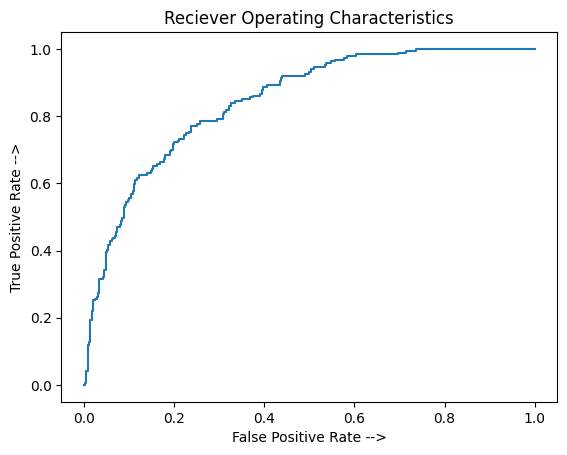

In [59]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

# Training on single row

In [60]:
x.head(1).T

,0
Glucose,148.000
BloodPressure,50.000
SkinThickness,35.000
Insulin,0.000
BMI,33.600
DiabetesPedigreeFunction,0.627
Age,50.000


In [61]:
x.head(1).T.shape

(7, 1)

In [62]:
columns = x.columns
print(columns)

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [63]:
len(columns)

7

In [68]:
# user intput
Glucose = 170
BloodPressure= 60
SkinThickness = 40
Insulin =1.5
BMI = 22.5
DiabetesPedigreeFunction = 0.62
Age = 45


In [69]:
columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [70]:
array = np.zeros(columns.shape[0],dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0])

In [71]:
len(columns)

7

In [72]:
array = np.zeros(columns.shape[0],dtype = int)
array[0] = Glucose
array[1] = BloodPressure
array[2] = SkinThickness
array[3] = Insulin
array[4] = BMI
array[5] = DiabetesPedigreeFunction
array[6] = Age
array

array([170,  60,  40,   1,  22,   0,  45])

In [73]:
dibetes_prediction = loan_model.predict([array])[0]
if dibetes_prediction == 0:
    print('The patient has no symptoms of diabetes,he is well.')
else:
    print('The patient has symptoms of diabetes,he should seek treatment.')

The patient has no symptoms of diabetes,he is well.


In [74]:
# store all this column is json 
dibetes_data  = {"columns":list(columns)}
dibetes_data

{'columns': ['Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [75]:
import json

with open("dibetes_data.json", "w") as f:
    json.dump(dibetes_data, f)

In [76]:
# Save Model in Pickle File
import pickle

with open("dibetes_model.pkl", "wb") as f:
    pickle.dump(dibetes_model, f)